<a href="https://colab.research.google.com/github/zakariahachadi123/PFE-Master-ID/blob/main/HeartDiseaseDetectionImplDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [63]:
hd=pd.read_csv('heart.csv')
hd.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
96,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
97,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
98,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0


In [64]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


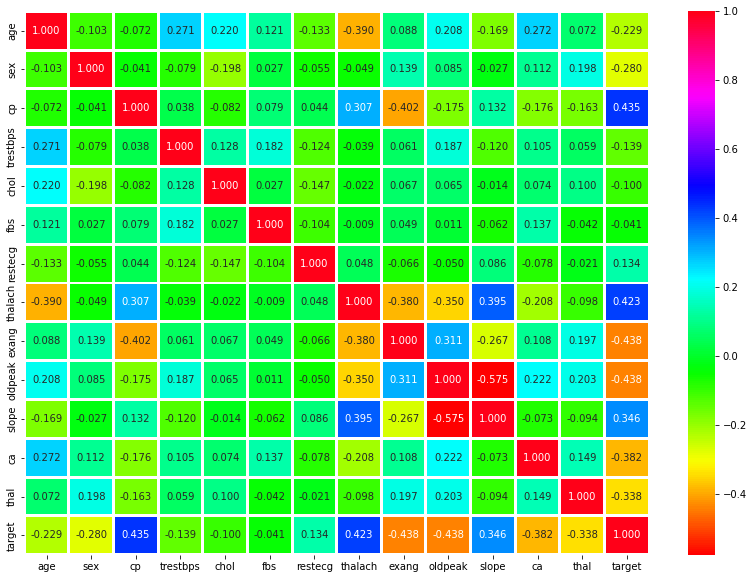

In [65]:
plt.figure(figsize=(14,10))
sns.heatmap(hd.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [13]:
hd.groupby('cp',as_index=False)['target'].mean()

,cp,target
0,0,0.245473
1,1,0.802395
2,2,0.771127
3,3,0.662338


In [14]:
hd.groupby('slope',as_index=False)['target'].mean()

,slope,target
0,0,0.378378
1,1,0.327801
2,2,0.724947


In [15]:
hd.groupby('thal',as_index=False)['target'].mean()

,thal,target
0,0,0.428571
1,1,0.328125
2,2,0.757353
3,3,0.219512


In [17]:
hd.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


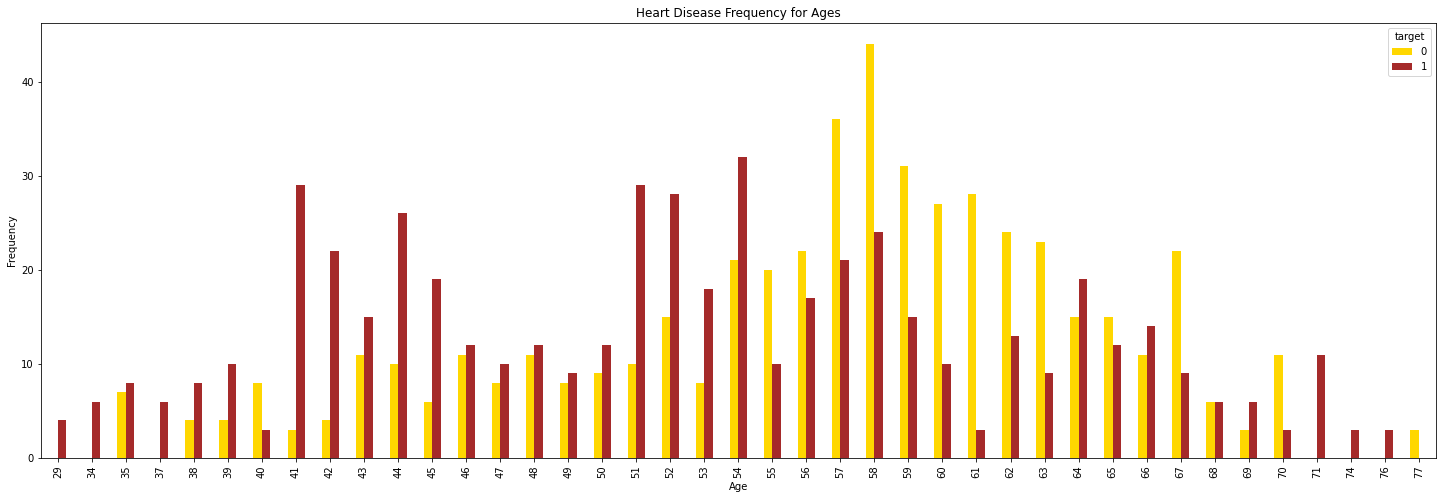

In [19]:
pd.crosstab(hd.age,hd.target).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

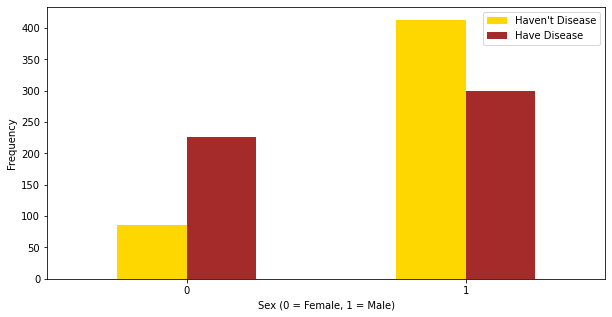

In [20]:
pd.crosstab(hd.sex,hd.target).plot(kind="bar",figsize=(10,5),color=['gold','brown'])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

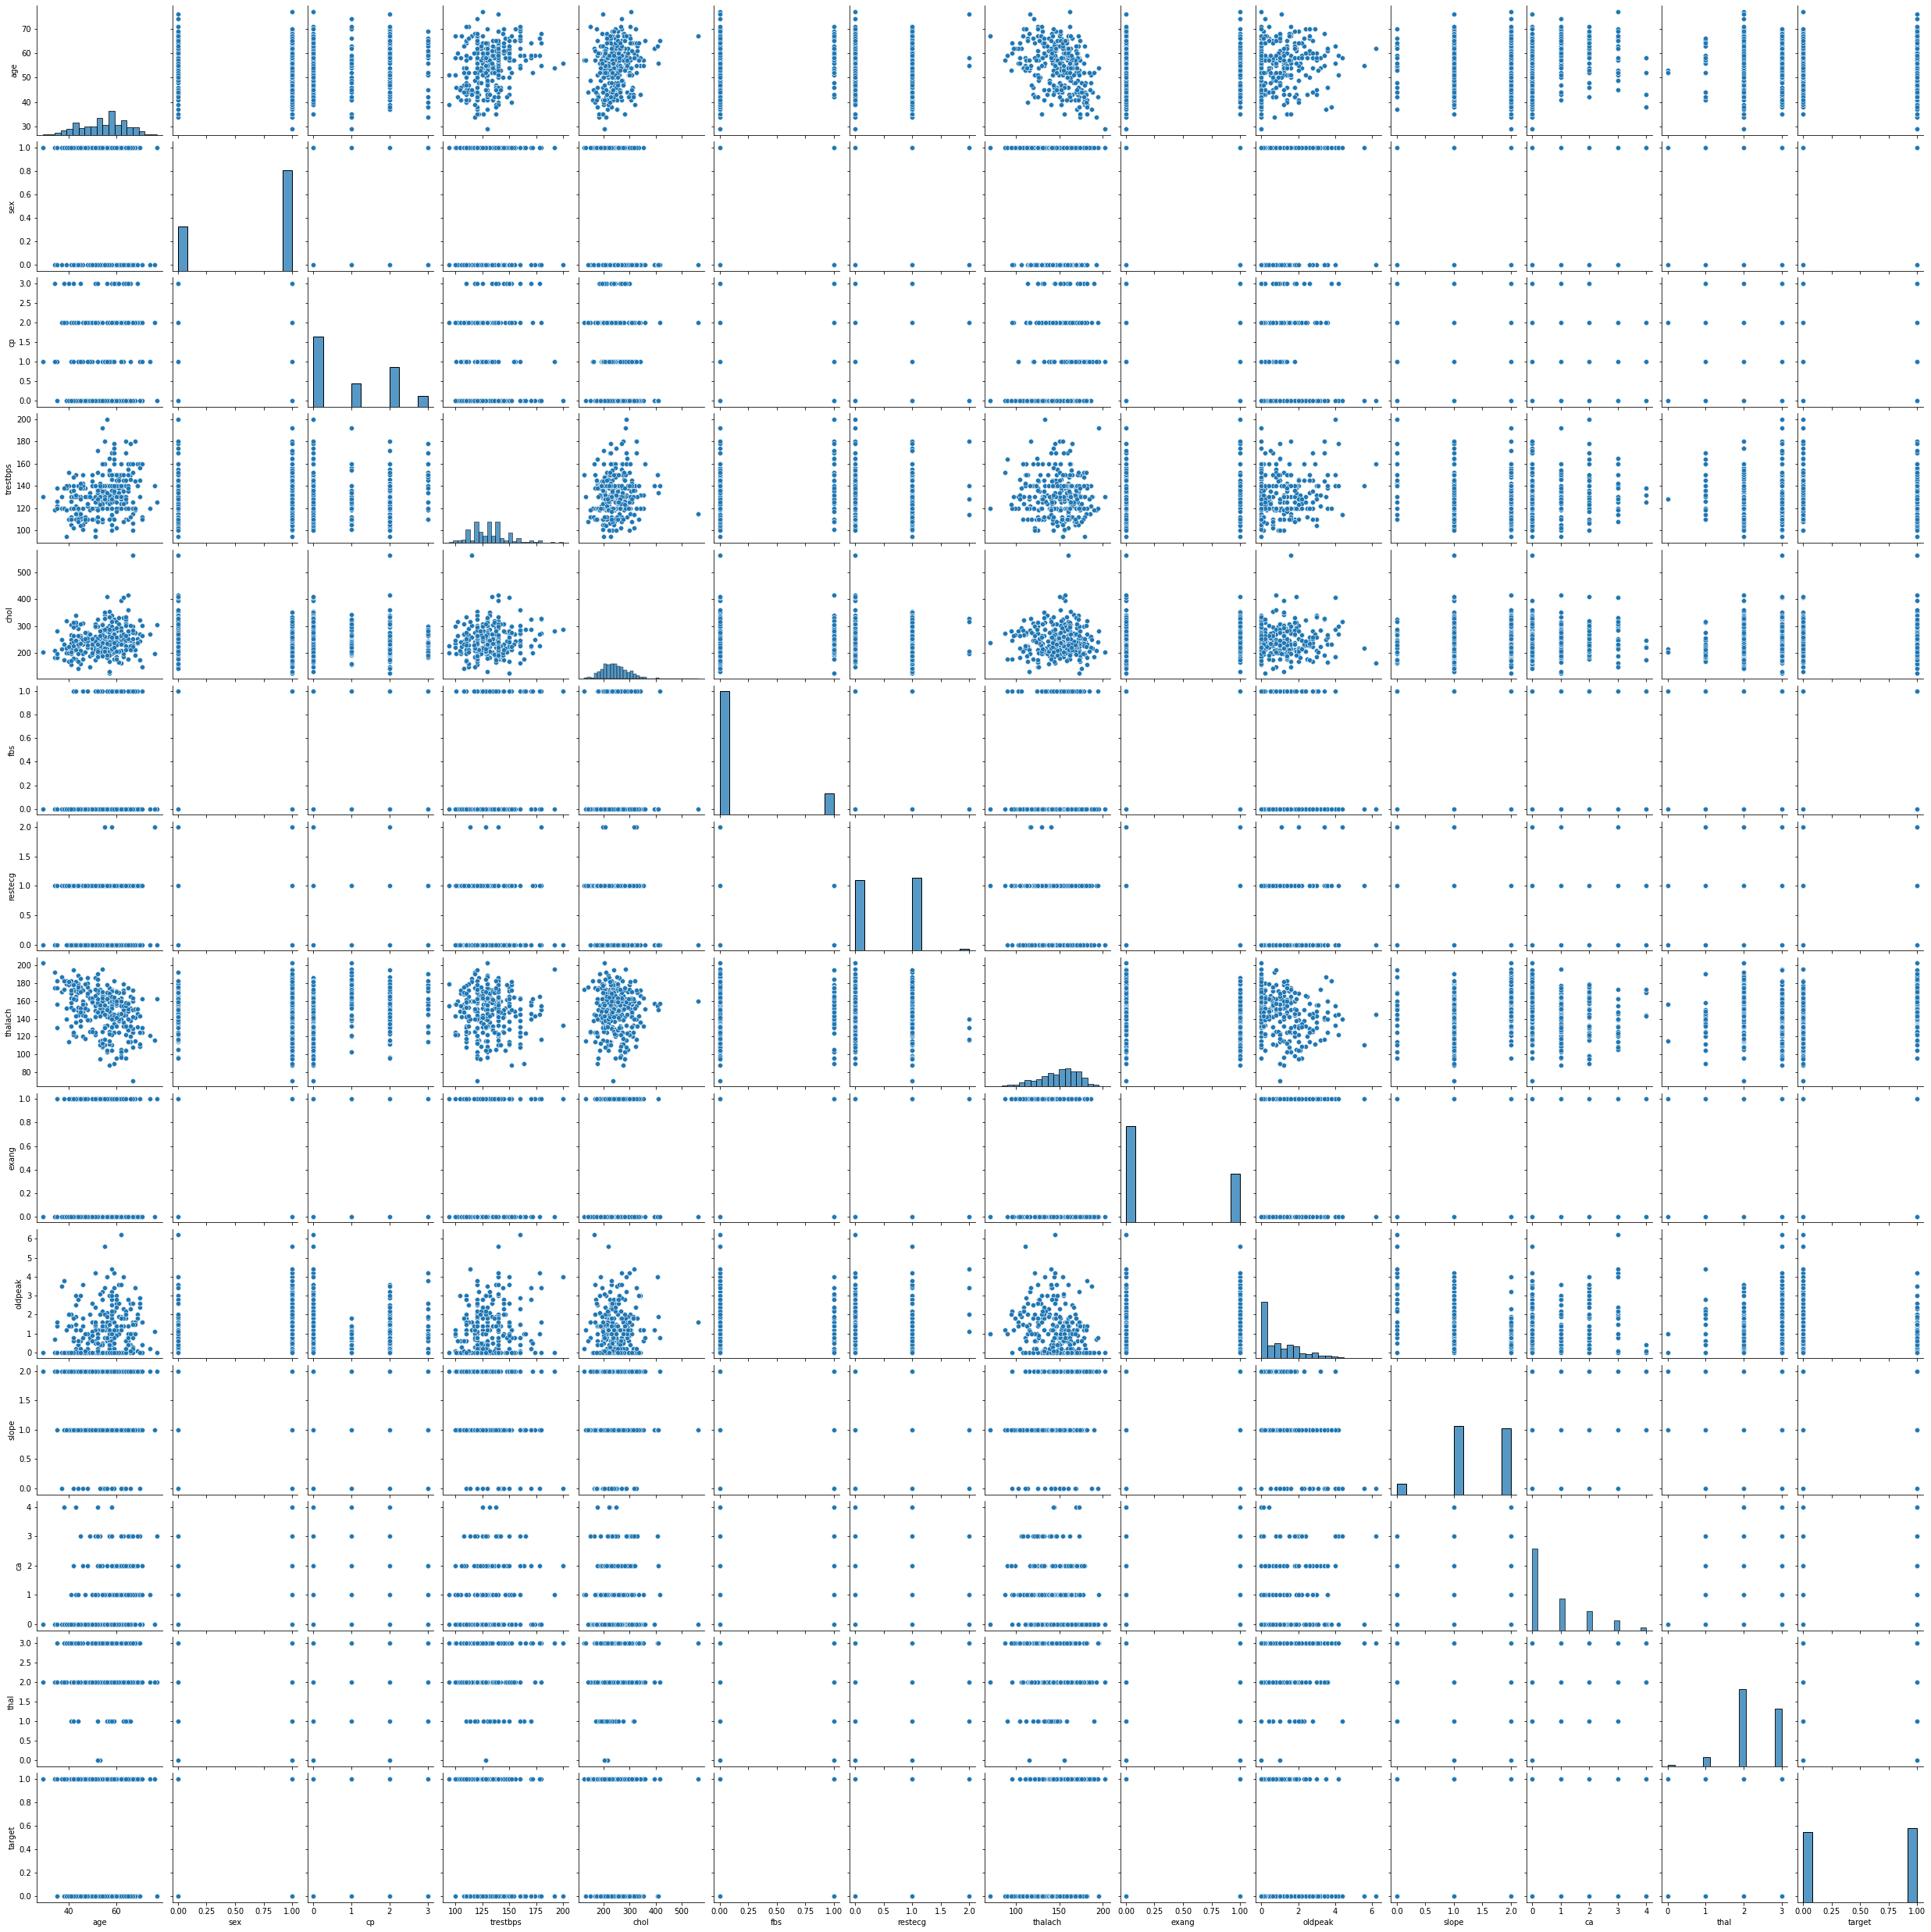

In [23]:
sns.pairplot(data=hd)

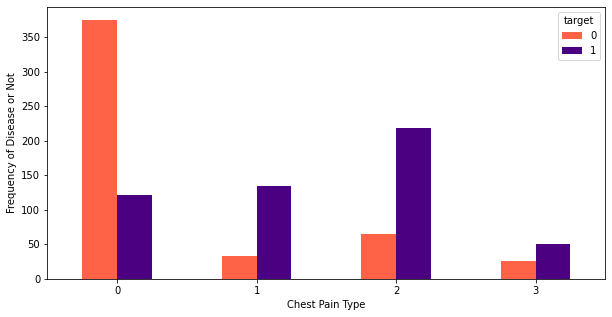

In [ ]:
pd.crosstab(hd.cp,hd.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

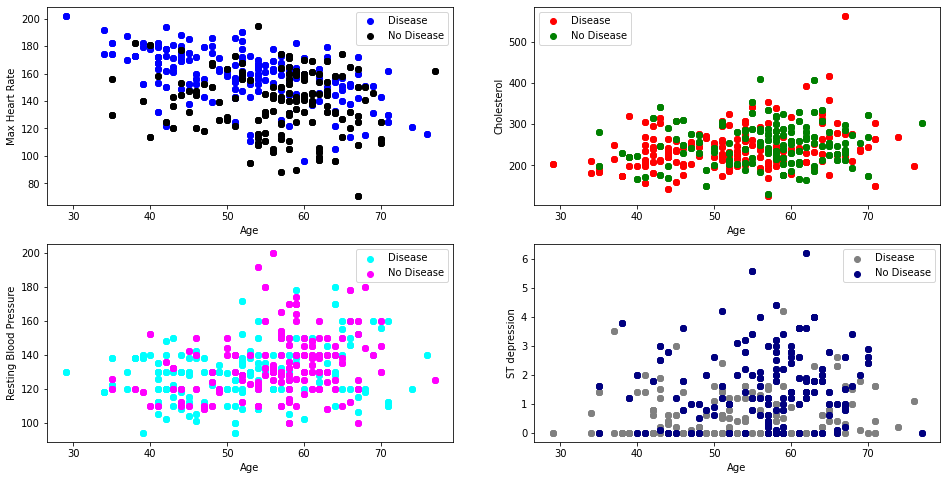

In [24]:
#Effet des paramètres sur les maladies cardiaques en fonction de l'âge
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=hd.age[hd.target==1],y=hd.thalach[hd.target==1],c='blue')
plt.scatter(x=hd.age[hd.target==0],y=hd.thalach[hd.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=hd.age[hd.target==1],y=hd.chol[hd.target==1],c='red')
plt.scatter(x=hd.age[hd.target==0],y=hd.chol[hd.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=hd.age[hd.target==1],y=hd.trestbps[hd.target==1],c='cyan')
plt.scatter(x=hd.age[hd.target==0],y=hd.trestbps[hd.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=hd.age[hd.target==1],y=hd.oldpeak[hd.target==1],c='grey')
plt.scatter(x=hd.age[hd.target==0],y=hd.oldpeak[hd.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()

In [66]:
#Création de variables factices
chest_pain=pd.get_dummies(hd['cp'],prefix='cp',drop_first=True)
hd=pd.concat([hd,chest_pain],axis=1)
hd.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(hd['slope'],prefix='slope')
th=pd.get_dummies(hd['thal'],prefix='thal')
rest_ecg=pd.get_dummies(hd['restecg'],prefix='restecg')
frames=[hd,sp,th,rest_ecg]
hd=pd.concat(frames,axis=1)
hd.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [67]:
hd.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,52,1,125,212,0,168,0,1.0,2,0,...,0,0,1,0,0,0,1,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,125,1,2.6,0,0,...,1,0,0,0,0,0,1,0,1,0
3,61,1,148,203,0,161,0,0.0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,62,0,138,294,1,106,0,1.9,3,0,...,0,1,0,0,0,1,0,0,1,0


In [27]:
X = hd.drop(['target'], axis = 1)
y = hd.target.values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
#Importation des bibliothèques et packages Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [73]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=22, units=11, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=11, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
82/82 [==============================] - 1s 2ms/step - loss: 0.6843 - accuracy: 0.7000
Epoch 2/100
82/82 [==============================] - 0s 4ms/step - loss: 0.5196 - accuracy: 0.8220
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 0.3784 - accuracy: 0.8317
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8354
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8488
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8598
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8671
Epoch 8/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3210 - accuracy: 0.8683
Epoch 9/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8793
Epoch 10/100
82/82 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8829
Epoch 11/

In [79]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

7/7 [==============================] - 0s 3ms/step


accuracy of the model:  0.9804878048780488


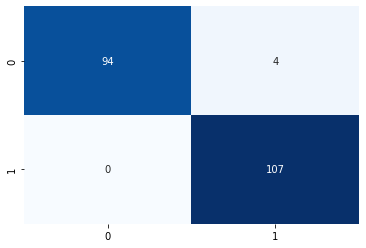

In [80]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the Neural Network model : ',ac)